In [217]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [218]:
RQ1 = pd.read_csv('../../data/analysis/RQ1.csv')

In [219]:
RQ1 = RQ1.drop(RQ1.columns[[0]], axis=1)

In [220]:
RQ1 = RQ1.rename(columns={"17/18":"17/18 Form", "17/18.1":"17/18 Apps"})

In [221]:
RQ1.head()

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,17/18 Form,17/18 Apps,Valid Seasons,Overall Points,Overall Apps,Average Form
0,Lionel Messi,FC Barcelona,Spanish Primera Division,30,Argentina,Forward,93,93,105000000.0,False,7.766667,30.0,5,1387.0,168.0,8.255952
1,Cristiano Ronaldo,Real Madrid CF,Spanish Primera Division,32,Portugal,Forward,94,94,95500000.0,False,7.291667,24.0,5,1300.0,164.0,7.926829
2,Luis Suarez,FC Barcelona,Spanish Primera Division,30,Uruguay,Forward,92,92,97000000.0,False,6.518519,27.0,5,1158.0,165.0,7.018182
3,Zlatan Ibrahimovic,Manchester United,English Premier League,35,Sweden,Forward,88,88,27000000.0,False,1.200000,5.0,5,1035.0,150.0,6.900000
4,Robert Lewandowski,FC Bayern Munich,German Bundesliga,28,Poland,Forward,91,91,92000000.0,False,6.846154,26.0,5,968.0,160.0,6.050000


In [222]:
RQ1.groupby(['overall']).count()['Average Form']

overall
62     1
63     1
65     1
67     2
68     1
70     2
71     9
72    25
73    34
74    51
75    72
76    60
77    84
78    57
79    77
80    64
81    37
82    54
83    28
84    18
85    13
86    15
87     6
88     9
89     6
90     4
91     1
92     2
93     1
94     1
Name: Average Form, dtype: int64

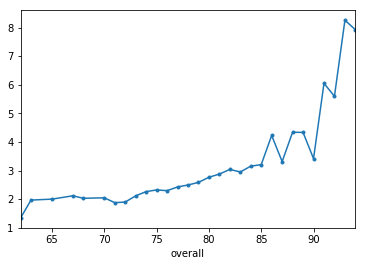

In [223]:
o = RQ1.groupby(['overall']).mean()['Average Form']
o.plot(style='.-')

## Goalkeepers

In [224]:
RQ1_Goalkeeper = RQ1[RQ1['Position'] == 'Goalkeeper']

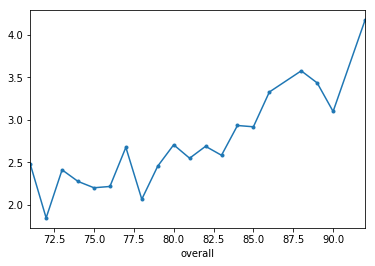

In [225]:
g = RQ1_Goalkeeper.groupby(['overall']).mean()['Average Form']
g.plot(style='.-')

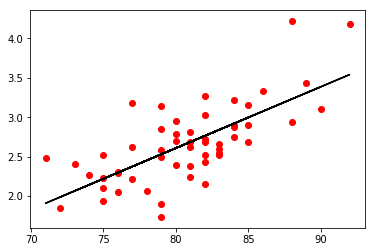

In [226]:
X = RQ1_Goalkeeper['overall'].values[:,np.newaxis]
y = RQ1_Goalkeeper['Average Form'].values
model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y,color='r')
plt.plot(X, model.predict(X),color='k')

plt.show()

In [227]:
RQ1_Goalkeeper["Distance"] = RQ1_Goalkeeper['Average Form'].values - model.predict(RQ1_Goalkeeper['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [228]:
gp_avg = RQ1_Goalkeeper[RQ1_Goalkeeper['Distance']>0]['Distance'].mean()
underrated_goalkeepers = RQ1_Goalkeeper[RQ1_Goalkeeper['Distance']>gp_avg]
underrated_goalkeepers = underrated_goalkeepers.sort_values('Distance', ascending=False).reset_index().drop('index',1)
underrated_goalkeepers['Expected Average Form'] = model.predict(underrated_goalkeepers['overall'].values[:,np.newaxis])
underrated_goalkeepers

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,17/18 Form,17/18 Apps,Valid Seasons,Overall Points,Overall Apps,Average Form,Distance,Expected Average Form
0,Jan Oblak,Atletico Madrid,Spanish Primera Division,24,Slovenia,Goalkeeper,88,93,57000000.0,False,4.645161,31.0,3,333.0,79.0,4.215190,0.985254,3.229936
1,Fraser Forster,Southampton,English Premier League,29,England,Goalkeeper,77,78,7000000.0,False,2.350000,20.0,3,274.0,86.0,3.186047,0.810117,2.375930
2,Manuel Neuer,FC Bayern Munich,German Bundesliga,31,Germany,Goalkeeper,92,92,61000000.0,False,4.333333,3.0,5,643.0,154.0,4.175325,0.634841,3.540483
3,David Ospina,Arsenal,English Premier League,28,Colombia,Goalkeeper,79,79,9000000.0,False,3.500000,2.0,3,245.0,78.0,3.141026,0.609822,2.531204
4,Julian Speroni,Crystal Palace,English Premier League,38,Argentina,Goalkeeper,71,71,160000.0,False,2.272727,11.0,2,186.0,75.0,2.480000,0.569892,1.910108
5,Claudio Bravo,Manchester City,English Premier League,34,Chile,Goalkeeper,82,82,9000000.0,False,3.000000,1.0,5,526.0,161.0,3.267081,0.502966,2.764114
6,Boaz Myhill,West Bromwich Albion,English Premier League,34,Wales,Goalkeeper,73,73,1600000.0,False,1.000000,1.0,3,135.0,56.0,2.410714,0.345332,2.065382
7,Neto,Valencia CF,Spanish Primera Division,27,Brazil,Goalkeeper,80,80,10000000.0,False,3.206897,29.0,2,236.0,80.0,2.950000,0.341159,2.608841
8,Willy Caballero,Chelsea,English Premier League,35,Argentina,Goalkeeper,79,79,3000000.0,False,3.000000,2.0,3,277.0,97.0,2.855670,0.324467,2.531204


In [229]:
gn_avg = RQ1_Goalkeeper[RQ1_Goalkeeper['Distance']<0]['Distance'].mean()
overrated_goalkeepers = RQ1_Goalkeeper[RQ1_Goalkeeper['Distance']<-gn_avg]
overrated_goalkeepers = overrated_goalkeepers.sort_values('Distance', ascending=True).reset_index().drop('index',1)
overrated_goalkeepers['Expected Average Form'] = model.predict(overrated_goalkeepers['overall'].values[:,np.newaxis])
overrated_goalkeepers

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,17/18 Form,17/18 Apps,Valid Seasons,Overall Points,Overall Apps,Average Form,Distance,Expected Average Form
0,Ron-Robert Zieler,VfB Stuttgart,German Bundesliga,28,Germany,Goalkeeper,79,80,10000000.0,False,2.862069,29.0,4,252.0,145.0,1.737931,-0.793273,2.531204
1,Rene Adler,1. FSV Mainz 05,German Bundesliga,32,Germany,Goalkeeper,79,79,7000000.0,True,2.090909,11.0,5,223.0,117.0,1.905983,-0.625221,2.531204
2,Orestis Karnezis,Watford,English Premier League,31,Greece,Goalkeeper,82,82,13500000.0,False,1.909091,11.0,3,245.0,114.0,2.149123,-0.614992,2.764114
3,Antonio Adan,Real Betis Balompie,Spanish Primera Division,30,Spain,Goalkeeper,81,81,11500000.0,False,2.366667,30.0,2,170.0,76.0,2.236842,-0.449635,2.686477
4,Koen Casteels,VfL Wolfsburg,German Bundesliga,25,Belgium,Goalkeeper,78,81,9000000.0,False,2.586207,29.0,4,161.0,78.0,2.064103,-0.389464,2.453567
5,Oliver Baumann,TSG 1899 Hoffenheim,German Bundesliga,27,Germany,Goalkeeper,82,84,18000000.0,False,2.655172,29.0,5,409.0,168.0,2.434524,-0.329591,2.764114
6,Diego Lopez,RCD Espanyol,Spanish Primera Division,35,Spain,Goalkeeper,83,83,6000000.0,False,2.777778,9.0,3,242.0,96.0,2.520833,-0.320918,2.841751
7,Marc Andre ter Stegen,FC Barcelona,Spanish Primera Division,25,Germany,Goalkeeper,85,89,35500000.0,False,4.225806,31.0,3,296.0,110.0,2.690909,-0.306116,2.997025
8,Lukas Hradecky,Eintracht Frankfurt,German Bundesliga,27,Finland,Goalkeeper,81,83,14500000.0,False,2.448276,29.0,2,160.0,67.0,2.388060,-0.298418,2.686477
9,Geronimo Rulli,Real Sociedad,Spanish Primera Division,25,Argentina,Goalkeeper,83,89,25500000.0,False,1.739130,23.0,3,245.0,96.0,2.552083,-0.289668,2.841751


## Defenders

In [230]:
RQ1_Defender = RQ1[RQ1['Position'] == 'Defender']

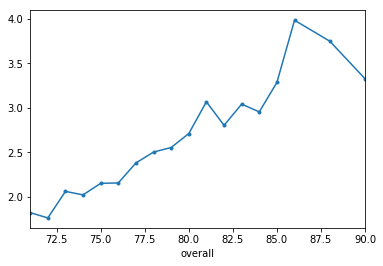

In [231]:
d = RQ1_Defender.groupby(['overall']).mean()['Average Form']
d.plot(style='.-')

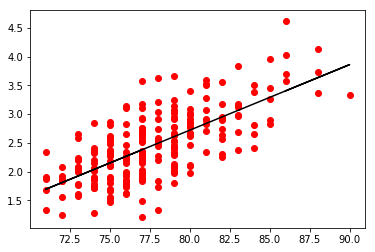

In [232]:
X = RQ1_Defender['overall'].values[:,np.newaxis]
y = RQ1_Defender['Average Form'].values
model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y,color='r')
plt.plot(X, model.predict(X),color='k')
plt.show()

In [233]:
RQ1_Defender["Distance"] = RQ1_Defender['Average Form'].values - model.predict(RQ1_Defender['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [234]:
dp_avg = RQ1_Defender[RQ1_Defender['Distance']>0]['Distance'].mean()
underrated_defenders = RQ1_Defender[RQ1_Defender['Distance']>dp_avg]
underrated_defenders = underrated_defenders.sort_values('Distance', ascending=False).reset_index().drop('index',1)
underrated_defenders['Expected Average Form'] = model.predict(underrated_defenders['overall'].values[:,np.newaxis])
underrated_defenders

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,17/18 Form,17/18 Apps,Valid Seasons,Overall Points,Overall Apps,Average Form,Distance,Expected Average Form
0,David Alaba,FC Bayern Munich,German Bundesliga,25,Austria,Defender,86,88,44500000.0,False,3.954545,22.0,5,610.0,132.0,4.621212,1.215650,3.405562
1,Lucas Hernandez,Atletico Madrid,Spanish Primera Division,21,France,Defender,77,88,13500000.0,False,4.272727,22.0,2,93.0,26.0,3.576923,1.200233,2.376691
2,Holger Badstuber,VfB Stuttgart,German Bundesliga,28,Germany,Defender,78,78,8500000.0,True,2.954545,22.0,3,145.0,40.0,3.625000,1.133990,2.491010
3,Patrice Evra,Olympique de Marseille,French Ligue 1,36,France,Defender,79,79,1400000.0,False,-0.333333,3.0,5,481.0,131.0,3.671756,1.066427,2.605329
4,Jesus Gamez,Newcastle United,English Premier League,32,Spain,Defender,76,76,4300000.0,False,3.500000,2.0,4,251.0,80.0,3.137500,0.875129,2.262371
5,Christian Fuchs,Leicester City,English Premier League,31,Austria,Defender,76,76,5000000.0,False,2.136364,22.0,2,211.0,68.0,3.102941,0.840570,2.262371
6,Jose Angel,SD Eibar,Spanish Primera Division,27,Spain,Defender,74,74,4600000.0,False,2.840000,25.0,2,114.0,40.0,2.850000,0.816267,2.033733
7,Oscar Wendt,Borussia Monchengladbach,German Bundesliga,31,Sweden,Defender,77,77,6000000.0,False,2.391304,23.0,5,391.0,123.0,3.178862,0.802171,2.376691
8,Jose Maria Gimenez,Atletico Madrid,Spanish Primera Division,22,Uruguay,Defender,83,87,28500000.0,False,3.700000,20.0,3,246.0,64.0,3.843750,0.781145,3.062605
9,Hector Bellerin,Arsenal,English Premier League,22,Spain,Defender,81,88,21000000.0,False,2.806452,31.0,3,320.0,89.0,3.595506,0.761539,2.833967


In [235]:
dn_avg = RQ1_Defender[RQ1_Defender['Distance']<0]['Distance'].mean()
overrated_defenders = RQ1_Defender[RQ1_Defender['Distance']<dn_avg]
overrated_defenders = overrated_defenders.sort_values('Distance', ascending=True).reset_index().drop('index',1)
overrated_defenders['Expected Average Form'] = model.predict(overrated_defenders['overall'].values[:,np.newaxis])
overrated_defenders

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,17/18 Form,17/18 Apps,Valid Seasons,Overall Points,Overall Apps,Average Form,Distance,Expected Average Form
0,Oscar Duarte,RCD Espanyol,Spanish Primera Division,28,Costa Rica,Defender,77,77,7000000.0,False,2.727273,11.0,2,35.0,29.0,1.206897,-1.169794,2.376691
1,Jorge Mere,1. FC Koln,German Bundesliga,20,Spain,Defender,78,84,12000000.0,False,1.500000,18.0,2,75.0,56.0,1.339286,-1.151724,2.491010
2,Jordi Amat,Real Betis Balompie,Spanish Primera Division,25,Spain,Defender,77,83,10500000.0,False,1.894737,19.0,4,117.0,79.0,1.481013,-0.895678,2.376691
3,Salif Sane,Hannover 96,German Bundesliga,26,Senegal,Defender,79,81,12500000.0,False,2.296296,27.0,4,185.0,103.0,1.796117,-0.809212,2.605329
4,Shkodran Mustafi,Arsenal,English Premier League,25,Germany,Defender,84,86,31500000.0,False,3.434783,23.0,5,337.0,140.0,2.407143,-0.769781,3.176924
5,Niklas Stark,Hertha BSC Berlin,German Bundesliga,22,Germany,Defender,78,85,12500000.0,False,2.625000,24.0,3,125.0,72.0,1.736111,-0.754899,2.491010
6,Timo Baumgartl,VfB Stuttgart,German Bundesliga,21,Germany,Defender,74,83,7500000.0,False,2.750000,24.0,2,50.0,39.0,1.282051,-0.751682,2.033733
7,Sidnei,RC Deportivo de La Coruna,Spanish Primera Division,27,Brazil,Defender,80,82,14500000.0,False,1.666667,21.0,4,210.0,106.0,1.981132,-0.738516,2.719648
8,Antonio Rudiger,Chelsea,English Premier League,24,Germany,Defender,82,86,24500000.0,False,3.782609,23.0,5,273.0,121.0,2.256198,-0.692088,2.948286
9,Niklas Sule,FC Bayern Munich,German Bundesliga,21,Germany,Defender,83,89,30500000.0,False,3.181818,22.0,4,257.0,108.0,2.379630,-0.682976,3.062605


## Midfielders

In [236]:
RQ1_Midfielder = RQ1[RQ1['Position'] == 'Midfielder']

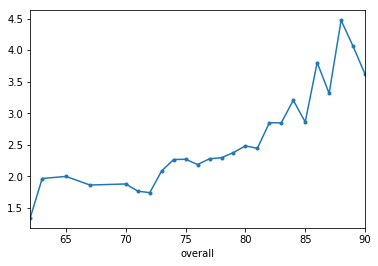

In [237]:
m = RQ1_Midfielder.groupby(['overall']).mean()['Average Form']
m.plot(style='.-')

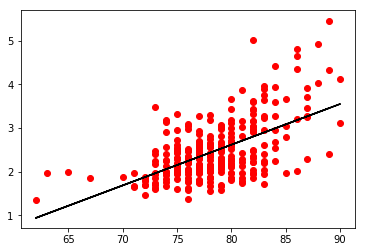

In [238]:
X = RQ1_Midfielder['overall'].values[:,np.newaxis]
y = RQ1_Midfielder['Average Form'].values
model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y,color='r')
plt.plot(X, model.predict(X),color='k')
plt.show()

In [239]:
RQ1_Midfielder["Distance"] = RQ1_Midfielder['Average Form'].values - model.predict(RQ1_Midfielder['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [240]:
mp_avg = RQ1_Midfielder[RQ1_Midfielder['Distance']>0]['Distance'].mean()
underrated_midfielders = RQ1_Midfielder[RQ1_Midfielder['Distance']>mp_avg]
underrated_midfielders = underrated_midfielders.sort_values('Distance', ascending=True).reset_index().drop('index',1)
underrated_midfielders['Expected Average Form'] = model.predict(underrated_midfielders['overall'].values[:,np.newaxis])
underrated_midfielders

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,17/18 Form,17/18 Apps,Valid Seasons,Overall Points,Overall Apps,Average Form,Distance,Expected Average Form
0,Sofiane Boufal,Southampton,English Premier League,23,Morocco,Midfielder,79,84,17000000.0,True,2.000000,26.0,3,202.0,67.0,3.014925,0.490628,2.524297
1,Erik Lamela,Tottenham Hotspur,English Premier League,25,Argentina,Midfielder,80,83,18500000.0,False,1.368421,19.0,3,368.0,118.0,3.118644,0.501258,2.617386
2,Mohamed Diame,Newcastle United,English Premier League,30,Senegal,Midfielder,73,73,3800000.0,False,2.040000,25.0,3,205.0,83.0,2.469880,0.504114,1.965765
3,Bruno Gama,RC Deportivo de La Coruna,Spanish Primera Division,29,Portugal,Midfielder,74,74,5500000.0,False,1.000000,5.0,2,154.0,60.0,2.566667,0.507813,2.058854
4,Heung Min Son,Tottenham Hotspur,English Premier League,24,Korea Republic,Midfielder,82,85,28000000.0,False,4.096774,31.0,2,209.0,63.0,3.317460,0.513897,2.803563
5,Alessandro Schopf,FC Schalke 04,German Bundesliga,23,Austria,Midfielder,77,82,12000000.0,False,1.333333,12.0,2,117.0,41.0,2.853659,0.515539,2.338120
6,Zlatko Junuzovic,SV Werder Bremen,German Bundesliga,29,Austria,Midfielder,79,79,12000000.0,False,2.842105,19.0,5,454.0,149.0,3.046980,0.522683,2.524297
7,Marco Fabian,Eintracht Frankfurt,German Bundesliga,27,Mexico,Midfielder,79,79,13000000.0,False,1.250000,4.0,2,107.0,35.0,3.057143,0.532846,2.524297
8,Dusan Tadic,Southampton,English Premier League,28,Serbia,Midfielder,80,80,15000000.0,False,2.600000,30.0,3,312.0,98.0,3.183673,0.566288,2.617386
9,Henrikh Mkhitaryan,Manchester United,English Premier League,28,Armenia,Midfielder,85,85,39000000.0,False,3.318182,22.0,4,420.0,115.0,3.652174,0.569345,3.082829


In [241]:
mn_avg = RQ1_Midfielder[RQ1_Midfielder['Distance']<0]['Distance'].mean()
overrated_midfielders = RQ1_Midfielder[RQ1_Midfielder['Distance']<mn_avg]
overrated_midfielders = overrated_midfielders.sort_values('Distance', ascending=True).reset_index().drop('index',1)
overrated_midfielders['Expected Average Form'] = model.predict(overrated_midfielders['overall'].values[:,np.newaxis])
overrated_midfielders

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,17/18 Form,17/18 Apps,Valid Seasons,Overall Points,Overall Apps,Average Form,Distance,Expected Average Form
0,Javier Mascherano,FC Barcelona,Spanish Primera Division,33,Argentina,Midfielder,83,83,10500000.0,False,1.857143,7.0,5,236.0,138.0,1.710145,-1.186507,2.896651
1,Sergio Busquets,FC Barcelona,Spanish Primera Division,28,Spain,Midfielder,86,86,36000000.0,False,2.250000,24.0,5,331.0,164.0,2.018293,-1.157625,3.175917
2,Casemiro,Real Madrid CF,Spanish Primera Division,25,Brazil,Midfielder,85,89,42000000.0,False,2.916667,24.0,3,120.0,61.0,1.967213,-1.115616,3.082829
3,Luka Modric,Real Madrid CF,Spanish Primera Division,31,Croatia,Midfielder,89,89,57000000.0,False,2.500000,22.0,5,336.0,140.0,2.400000,-1.055183,3.455183
4,N'Golo Kante,Chelsea,English Premier League,26,France,Midfielder,87,90,52500000.0,False,2.178571,28.0,3,249.0,109.0,2.284404,-0.984602,3.269006
5,Julian Weigl,Borussia Dortmund,German Bundesliga,21,Germany,Midfielder,81,87,21000000.0,False,1.857143,21.0,2,105.0,60.0,1.750000,-0.960474,2.710474
6,Moussa Dembele,Tottenham Hotspur,English Premier League,29,Belgium,Midfielder,83,83,25000000.0,False,1.560000,25.0,4,224.0,115.0,1.947826,-0.948825,2.896651
7,Tiemoue Bakayoko,Chelsea,English Premier League,22,France,Midfielder,82,88,26000000.0,False,2.200000,25.0,4,162.0,87.0,1.862069,-0.941494,2.803563
8,Francis Coquelin,Arsenal,English Premier League,26,France,Midfielder,79,80,12000000.0,False,1.626984,16.0,5,165.0,104.0,1.586538,-0.937758,2.524297
9,Dani Garcia,SD Eibar,Spanish Primera Division,27,Spain,Midfielder,81,82,17000000.0,False,1.576923,26.0,3,186.0,104.0,1.788462,-0.922013,2.710474


## Forwards

In [242]:
RQ1_Forward = RQ1[RQ1['Position'] == 'Forward']

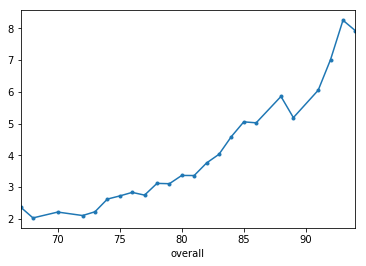

In [243]:
f = RQ1_Forward.groupby(['overall']).mean()['Average Form']
f.plot(style='.-')

In [244]:
RQ1_Forward["Distance"] = RQ1_Forward['Average Form'].values - model.predict(RQ1_Forward['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


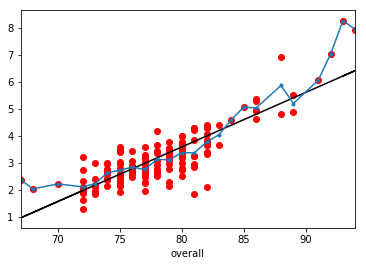

In [245]:
X = RQ1_Forward['overall'].values[:,np.newaxis]
y = RQ1_Forward['Average Form'].values
model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y,color='r')
plt.plot(X, model.predict(X),color='k')
f.plot(style='.-')
plt.show()

In [246]:
fp_avg = RQ1_Forward[RQ1_Forward['Distance']>0]['Distance'].mean()
underrated_forwards = RQ1_Forward[RQ1_Forward['Distance']>fp_avg]
underrated_fowards = underrated_forwards.sort_values('Distance', ascending=False).reset_index().drop('index',1)
underrated_forwards['Expected Average Form'] = model.predict(underrated_forwards['overall'].values[:,np.newaxis])
underrated_forwards

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,17/18 Form,17/18 Apps,Valid Seasons,Overall Points,Overall Apps,Average Form,Distance,Expected Average Form
0,Lionel Messi,FC Barcelona,Spanish Primera Division,30,Argentina,Forward,93,93,105000000.0,False,7.766667,30.0,5,1387.0,168.0,8.255952,4.428415,6.206586
1,Cristiano Ronaldo,Real Madrid CF,Spanish Primera Division,32,Portugal,Forward,94,94,95500000.0,False,7.291667,24.0,5,1300.0,164.0,7.926829,4.006203,6.408593
2,Luis Suarez,FC Barcelona,Spanish Primera Division,30,Uruguay,Forward,92,92,97000000.0,False,6.518519,27.0,5,1158.0,165.0,7.018182,3.283733,6.004580
3,Zlatan Ibrahimovic,Manchester United,English Premier League,35,Sweden,Forward,88,88,27000000.0,False,1.200000,5.0,5,1035.0,150.0,6.900000,3.537905,5.196552
4,Robert Lewandowski,FC Bayern Munich,German Bundesliga,28,Poland,Forward,91,91,92000000.0,False,6.846154,26.0,5,968.0,160.0,6.050000,2.408639,5.802573
5,Sergio Aguero,Manchester City,English Premier League,29,Argentina,Forward,89,89,66500000.0,False,6.720000,25.0,5,808.0,147.0,5.496599,2.041415,5.398559
7,Harry Kane,Tottenham Hotspur,English Premier League,23,England,Forward,86,90,59000000.0,False,5.935484,31.0,4,622.0,116.0,5.362069,2.186152,4.792538
8,Karim Benzema,Real Madrid CF,Spanish Primera Division,29,France,Forward,86,86,44500000.0,False,3.720000,25.0,5,791.0,150.0,5.273333,2.097416,4.792538
9,Alexandre Lacazette,Arsenal,English Premier League,26,France,Forward,85,88,48500000.0,False,3.857143,28.0,5,829.0,164.0,5.054878,1.972049,4.590531
11,Diego Costa,Chelsea,English Premier League,28,Spain,Forward,86,86,46000000.0,False,3.250000,12.0,5,769.0,155.0,4.961290,1.785373,4.792538


In [247]:
fn_avg = RQ1_Forward[RQ1_Forward['Distance']<0]['Distance'].mean()
overrated_forwards = RQ1_Forward[RQ1_Forward['Distance']<fn_avg]
overrated_forwards = overrated_forwards.sort_values('Distance', ascending=True).reset_index().drop('index',1)
overrated_forwards['Expected Average Form'] = model.predict(overrated_forwards['overall'].values[:,np.newaxis])
overrated_forwards

,Players,club,league,age,nationality,Position,overall,potential,eur_value,injury_prone_trait,17/18 Form,17/18 Apps,Valid Seasons,Overall Points,Overall Apps,Average Form,Distance,Expected Average Form
0,Andres Guardado,Real Betis Balompie,Spanish Primera Division,30,Mexico,Forward,81,81,16500000.0,False,2.960000,25.0,2,96.0,52.0,1.846154,-0.864320,3.782504
1,Manu Trigueros,Villarreal CF,Spanish Primera Division,25,Spain,Forward,82,85,27500000.0,False,2.214286,28.0,4,287.0,137.0,2.094891,-0.708672,3.984511
2,Erik Moran,CD Leganes,Spanish Primera Division,26,Spain,Forward,72,76,3300000.0,False,1.000000,6.0,2,37.0,29.0,1.275862,-0.596814,1.964442
3,Recio,Malaga CF,Spanish Primera Division,26,Spain,Forward,77,81,9500000.0,False,2.045455,22.0,5,253.0,130.0,1.946154,-0.391966,2.974476
4,John Guidetti,RC Celta de Vigo,Spanish Primera Division,25,Sweden,Forward,79,83,16500000.0,False,2.157895,19.0,2,137.0,64.0,2.140625,-0.383672,3.378490


In [257]:
underrated_players = pd.concat([underrated_goalkeepers,underrated_defenders,underrated_midfielders,underrated_forwards], axis=0).reset_index()


In [258]:
overrated_players = pd.concat([overrated_goalkeepers,overrated_defenders,overrated_midfielders,overrated_forwards], axis=0).reset_index()

In [260]:
underrated_players['FIFA'] = abs(underrated_players['17/18 Form'] - underrated_players['Average Form'])
underrated_players['US'] = abs(underrated_players['17/18 Form'] - underrated_players['Expected Average Form'])

In [262]:
underrated_players.loc[underrated_players['FIFA']>underrated_players['US'],'Verdict'] = 'FIFA'
underrated_players.loc[underrated_players['FIFA']<underrated_players['US'],'Verdict'] = 'US'
underrated_players.loc[underrated_players['FIFA'] == underrated_players['US'],'Verdict'] = 'SAME'

In [263]:
underrated_players

,index,Players,club,league,age,nationality,Position,overall,potential,eur_value,...,17/18 Apps,Valid Seasons,Overall Points,Overall Apps,Average Form,Distance,Expected Average Form,FIFA,US,Verdict
0,0,Jan Oblak,Atletico Madrid,Spanish Primera Division,24,Slovenia,Goalkeeper,88,93,57000000.0,...,31.0,3,333.0,79.0,4.215190,0.985254,3.229936,0.429971,1.415225,US
1,1,Fraser Forster,Southampton,English Premier League,29,England,Goalkeeper,77,78,7000000.0,...,20.0,3,274.0,86.0,3.186047,0.810117,2.375930,0.836047,0.025930,FIFA
2,2,Manuel Neuer,FC Bayern Munich,German Bundesliga,31,Germany,Goalkeeper,92,92,61000000.0,...,3.0,5,643.0,154.0,4.175325,0.634841,3.540483,0.158009,0.792850,US
3,3,David Ospina,Arsenal,English Premier League,28,Colombia,Goalkeeper,79,79,9000000.0,...,2.0,3,245.0,78.0,3.141026,0.609822,2.531204,0.358974,0.968796,US
4,4,Julian Speroni,Crystal Palace,English Premier League,38,Argentina,Goalkeeper,71,71,160000.0,...,11.0,2,186.0,75.0,2.480000,0.569892,1.910108,0.207273,0.362619,US
5,5,Claudio Bravo,Manchester City,English Premier League,34,Chile,Goalkeeper,82,82,9000000.0,...,1.0,5,526.0,161.0,3.267081,0.502966,2.764114,0.267081,0.235886,FIFA
6,6,Boaz Myhill,West Bromwich Albion,English Premier League,34,Wales,Goalkeeper,73,73,1600000.0,...,1.0,3,135.0,56.0,2.410714,0.345332,2.065382,1.410714,1.065382,FIFA
7,7,Neto,Valencia CF,Spanish Primera Division,27,Brazil,Goalkeeper,80,80,10000000.0,...,29.0,2,236.0,80.0,2.950000,0.341159,2.608841,0.256897,0.598056,US
8,8,Willy Caballero,Chelsea,English Premier League,35,Argentina,Goalkeeper,79,79,3000000.0,...,2.0,3,277.0,97.0,2.855670,0.324467,2.531204,0.144330,0.468796,US
9,0,David Alaba,FC Bayern Munich,German Bundesliga,25,Austria,Defender,86,88,44500000.0,...,22.0,5,610.0,132.0,4.621212,1.215650,3.405562,0.666667,0.548983,FIFA


Text(0.5,1,'Number of appearances in dataset')

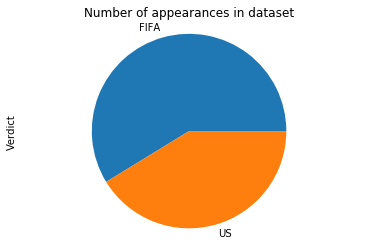

In [273]:
underrated_players.Verdict.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Number of appearances in dataset')

Text(0.5,1,'Number of appearances in dataset')

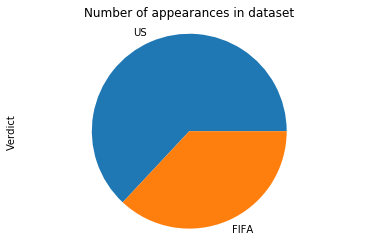

In [271]:
overrated_players['FIFA'] = abs(overrated_players['17/18 Form'] - overrated_players['Average Form'])
overrated_players['US'] = abs(overrated_players['17/18 Form'] - overrated_players['Expected Average Form'])

overrated_players.loc[overrated_players['FIFA']>overrated_players['US'],'Verdict'] = 'FIFA'
overrated_players.loc[overrated_players['FIFA']<overrated_players['US'],'Verdict'] = 'US'
overrated_players.loc[overrated_players['FIFA'] == overrated_players['US'],'Verdict'] = 'SAME'

overrated_players.Verdict.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Number of appearances in dataset')